<a href="https://colab.research.google.com/github/youkyung2/dataAnalysis/blob/master/%EB%B6%93%EA%BD%83%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예측(분류) 프로세스

* 1. 데이터 세트 분리 : 학습데이터와 테스트데이터로 분리 (train_test_split())
* 2. 모델 학습 : 학습데이터를 기반으로 머신러닝 알고리즘을 적용하여 모델을 학습
* 3. 예측 수행 : 학습된 모델을 이용하여 테스트 데이터의 분류를 예측
* 4. 평가 : 예측 결과값과 실제 결과값을 비교하여 모델 성능을 평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
print(type(iris))
print(type(iris.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
display(iris.target, iris.target.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150,)

In [ ]:
display(iris.target[iris.target==0].shape,
        iris.target[iris.target==1].shape,
        iris.target[iris.target==2].shape)

(50,)

(50,)

(50,)

In [ ]:
display(iris.data.shape, iris.data[:5])

(150, 4)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# 훈련세트와 데이터세트로 분리
# train_test_split() : 훈련세트를 75%, 테스트세트를 25%로 나눈다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4)

(38, 4)

(112,)

(38,)

In [ ]:
display(X_train[:5], y_train[:5])

array([[6.5, 3. , 5.8, 2.2],
       [4.8, 3. , 1.4, 0.3],
       [6.6, 3. , 4.4, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.2, 2. ]])

array([2, 0, 1, 2, 2])

In [ ]:
# 4가지 속성에 대한 산점도 그리기
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.5,3.0,5.8,2.2
1,4.8,3.0,1.4,0.3
2,6.6,3.0,4.4,1.4
3,6.4,3.2,5.3,2.3
4,6.5,3.0,5.2,2.0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
dtypes: float64(4)
memory usage: 3.6 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.914286,3.060714,3.909821,1.258929
std,0.823075,0.436686,1.755453,0.758917
min,4.300000,2.000000,1.100000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,6.000000,3.000000,4.500000,1.400000
75%,6.425000,3.300000,5.225000,1.825000
max,7.900000,4.400000,6.900000,2.500000


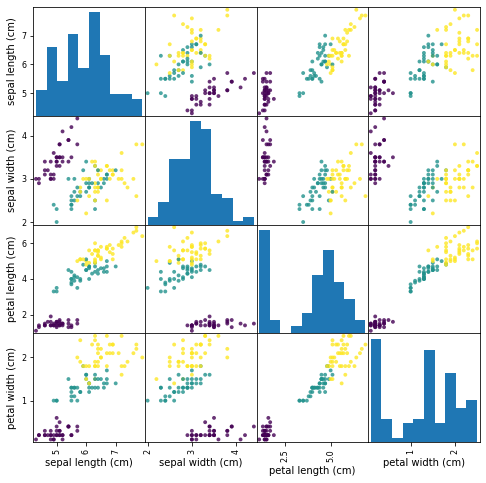

In [ ]:
pd.plotting.scatter_matrix(iris_df, c=y_train, s=60, alpha=0.8, figsize=[8,8])
print('')

In [ ]:
# K-NN (최근접 이웃) 예측모델 적용

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
model.predict([[6,3,4,1.5]])

array([1])

In [ ]:
# 모델 평가(성능 확인)

score = model.score(X_test, y_test)
print(score)

0.9736842105263158


In [ ]:
pred_y = model.predict(X_test)
(model.predict(X_test)==y_test).mean()

0.9736842105263158

---

In [42]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# 성능을 높이기 위하여, StandardScaler 실행 후에 모델에 적용해보자.
# 모델 : 랜덤포레스트 사용

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [44]:
print(iris_df_scaled.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target)

# 랜덤포레스트 모델 학습
randommodel = RandomForestClassifier(n_estimators=5, random_state=0)
randommodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
# 평가
print('훈련 세트 정확도 : {:.3f}'.format(randommodel.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(randommodel.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.895


In [53]:
# K-NN (최근접 이웃) 모델 학습
from sklearn.neighbors import KNeighborsClassifier

knmodel = KNeighborsClassifier(n_neighbors=1)
knmodel.fit(X_train, y_train)

# 평가
print('훈련 세트 정확도 : {:.3f}'.format(randommodel.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(randommodel.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.895
